# 神经网络
> 在上个部分中，我们学习了如何在TensorFlow 2.0中构建模型。将应用这些相同的工具来构建、训练和进行神经网络的预测。我们将学习如何定义密集层、应用激活函数、选择优化器以及应用正则化来减少过拟合。同学们将利用TensorFlow的灵活性，同时使用低级别的线性代数和高级别的Keras API操作来定义和训练模型。

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

tf.__version__

'2.10.0'

## 全连接层

### 全连接层的线性代数计算
有两种方法可以在张量流中定义密集层。  
- 涉及使用低级线性代数运算。  
- 使用高级 keras 操作。  
我们将使用第一种方法来构建下图所示的网络。

<img src="../img/2_3_network.png" alt="drawing" style="width:600px;height:500px;"/>

输入层包含3个要素--‘教育’、‘婚姻状况’和‘年龄’，做为我们的输入`borrower_features`。隐藏层包含两个节点，输出层包含一个节点

In [132]:
borrower_features = np.array([[2.,2.,43.,]],np.float32)

In [133]:
# 初始化 bias1
bias1 = tf.Variable(1.0, tf.float32)
# 将weights1初始化为3x2的全为1的变量
weights1 = tf.Variable(tf.ones((3, 2)))

# 执行borrower_features与weights1的矩阵乘法
product1 = tf.matmul(borrower_features,weights1)

## 对product1 + bias1应用sigmoid激活函数
desen1 = tf.keras.activations.sigmoid(product1+bias1)

# 打印dense1的形状
print("全连接层的形状是: {}".format(desen1.shape))

全连接层的形状是: (1, 2)


In [134]:
# 初始化权重2和偏置2

bias2  =  tf.Variable(1.0, tf.float32)
weights2= tf.Variable(tf.ones((2, 1)))
# 执行矩阵乘法

product2 =  tf.matmul(desen1,weights2)

# 使用激活函数product2 + bias2
prediction = tf.keras.activations.sigmoid(product2+bias2)
print('预测值: {}'.format(prediction.numpy()[0, 0]))
print('\n 实际值: 1')

预测值: 0.9525741338729858

 实际值: 1


我们的模型在0到1之间生成了预测值。对于我们考虑的例子，实际值为1，而预测值是一个介于0和1之间的概率值。当然，由于我们还没有对模型的参数进行训练，这并没有什么意义。

### 使用Keras来定义全连接层
现在我们已经看到了如何使用线性代数在张量流中定义全连接层。下面，我们将跳过线性代数，让 keras 计算细节。这将允许我们构建下面的网络，它有 2 个隐藏层和 10 个特征，使用的代码比具有 1 个隐藏层和 3 个特征的网络所需的代码少。


<img src="../img/2_4_network.png" alt="drawing" style="width:400px;"/>


为了构建这个网络，我们需要定义三个密集层，每个层都把前一层作为输入，乘以权重，并应用一个激活函数。

In [135]:
df = pd.read_csv('../data/uci_credit_card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [136]:
#特定的列作为特征，并将其转换为 TensorFlow 张量
features = df.columns[1:11].tolist()
borrower_features = df[features].values
borrower_features = tf.convert_to_tensor(borrower_features,np.float32)
idx = tf.constant(list(range(0,100)))
borrower_features=tf.gather(borrower_features,idx)

In [137]:
# 定义第一个全连接层
dense1 = tf.keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# 定义第二个全连接层
dense2 = tf.keras.layers.Dense(3, activation='sigmoid')(dense1)


# 定义最后一个全连接层
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

# 打印出各个层的形状
print('\n dense1的形状: ', dense1.shape)
print('\n dense2的形状: ', dense2.shape)
print('\n 输出层的形状: ', predictions.shape)


 dense1的形状:  (100, 7)

 dense2的形状:  (100, 3)

 输出层的形状:  (100, 1)


在本例中，我们仅用了 8 行代码就定义了两个稠密隐藏层和一个输出层。需要注意的是，每个层都有 100 行，因为输入数据包含了 100 个示例。简而言之，这段话强调了高级操作的简单性和效率，并且指出了每个层的行数等于示例数的事实。

## 激活函数
   - 隐藏层中的典型组件
      -  线性：矩阵乘法
      - 非线性：矩阵乘法

### 二分类问题
我们再次使用之前的信用卡数据。目标变量`default`表示信用卡持有人在下一个期间是否违约。由于只有两种选项——**违约或未违约**——这是一个二分类问题。尽管数据集有很多特征，但我们只关注其中三个：最近三个信用卡账单的大小。最后，计算你经过训练的网络的预测输出`outputs`，并将其与目标变量 `default` 进行对比。

In [138]:
bill_amounts = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3']].to_numpy()
default = df[['default.payment.next.month']].to_numpy()

In [139]:
# 构建输入层
inputs = tf.constant(bill_amounts,tf.float32)
# 定义第一个隐藏层 3个节点
dense1 = tf.keras.layers.Dense(3, activation='relu')(inputs)

# 定义第二个隐藏层  2个节点
dense2 = tf.keras.layers.Dense(2, activation='relu')(dense1)


# 定义输出层
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

# 打印前五个的误差
error = default[:5] - outputs.numpy()[:5]
print(error)

[[ 0. ]
 [ 0. ]
 [-1. ]
 [-1. ]
 [-0.5]]


如果多次运行代码，大家会注意到每次错误都会有所变化。这是因为我们使用的是一个未经训练且参数随机初始化的模型。此外，错误落在-1到1之间的区间，是因为default是一个二元变量，取值为0和1，而outputs是一个介于0和1之间的概率值。

### 多类别分类问题
我们尝试一下从二分类问题过渡到多分类问题。多分类问题可以具有三个或更多值的目标。在信用卡数据集中，教育变量可以采用6个不同的值，以对应不同的教育级别。我们尝试以教育程度为目标，将我们的特征值从3列扩展到10列

In [140]:
features = df.columns[1:11].tolist()
borrower_features = df[features].values

In [141]:
# 构建输入层
inputs = tf.constant(borrower_features, tf.float32)

# 定义第一个全连接神经网络，10个节点
dense1 = tf.keras.layers.Dense(10, activation='sigmoid')(inputs)

# 定义第二个全连接神经网络
dense2 = tf.keras.layers.Dense(8, activation='relu')(dense1)

# 定义输出层
outputs = tf.keras.layers.Dense(6, activation='softmax')(dense2)

#答应结果
print(outputs.numpy()[:3])

[[0.14944354 0.21787906 0.17594026 0.16889884 0.150009   0.13782929]
 [0.14944354 0.21787906 0.17594026 0.16889884 0.150009   0.13782929]
 [0.14944354 0.21787906 0.17594026 0.16889884 0.150009   0.13782929]]


每一行的`output`总和为1.与前面的练习一样，我们的预测尚无信息，因为我们使用的是具有随机初始化参数的未经训练的模型。这就是为什么模型倾向于为每个类分配相似的概率。

## 优化器
- 随机梯度下降优化器(SGD)
    - 简单与易于解释
- 均方根传播优化器(RMS)
    - 每个特征应用不同的学习率
    - 权重更新的过程中结合了动量的建立与衰减
- Adam优化器
    - 使用默认参数就会有很好的表现。

### 局部最小值
下图绘制了一个损失函数，`loss_function`。图中，我们可以看到包含了一个“全局最小值”和一个“局部最小值”。

<img src="../img/local_minima_dots.png">


使用`keras.optimizers.SGD()`来寻找`loss_function()`的全局最小值。我们将进行两次尝试，每次都使用不同的输入初始值来调用loss_function()。首先，我们将会将使用初始值为6.0的变量x_1；其次，我们将会将使用初始值为0.3的变量x_2。

In [142]:
#定义一个上图的loss function
import math
def loss_function(x):
    return 4.0 * math.cos(x - 1) + math.cos(2.0 * math.pi * x) / x

In [143]:
# 初始化x_1和x_2
x_1 = tf.Variable(6.0, tf.float32)
x_2 = tf.Variable(0.3, tf.float32)

#定义优化器
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
for j in range(100):
    # 使用x_1寻找loss_function的最小值
    opt.minimize(lambda: loss_function(x_1),var_list=[x_1])
    # 使用x_2寻找loss_function的最小值
    opt.minimize(lambda: loss_function(x_2),var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

6.027515 0.25


使用了相同的优化器和损失函数，但是使用了两个不同的初始值，得到了不同的最小值。使用x_2的时候，并没有找到全局的最小值，而只是找到了局部的最小值

### 避免局部最小值
我们可以看到损失函数很容易陷入到局部最小值设计的陷阱。解决这个问题的一种方法是使用**动量**，这使得优化器能够突破局部最小值。我们会再次使用上一个问题中定义好的并可用的损失函数`loss_function()`。
在Tensorflow中，很多优化器都有动量，我们尝试使用RMSprop优化器。我们构建两个变量x_1与x_2 分别设置不同的动量，来比较一样它们之间不同

In [144]:
# 初始化x_1和x_2
x_1 = tf.Variable(0.05, tf.float32)
x_2 = tf.Variable(0.05, tf.float32)

# 构建2个优化器，分别为设置不同的动量
opt_1 = tf.keras.optimizers.RMSprop(learning_rate=0.01,momentum=0.99)
opt_2 = tf.keras.optimizers.RMSprop(learning_rate=0.01,momentum=0.00)

for j in range(100):
    opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    
    opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])
    

print(x_1.numpy(), x_2.numpy())

2.744511 0.24999999


全局最小值约为4.38。请注意，opt_1积累了动量，使得x_1更接近全局最小值。相反地，具有动量参数为0.0的opt_2在左侧的局部最小值处停滞不前。

## 初始化与dropout
- 随机初始化
    - 经常需要初始化成千上万的变量
        - `tf.ones`可能没有很好的表现在寻找损失函数最小值方面
        -  给每一个变量赋值过程过于繁琐
    - 从分布中随机抽样初始值
        - 正太分布
        - 随机分布
        - Glorot初始化
- 对抗过度拟合
    - dropout

### Tensorflow中的初始化
好的初始化可以减少寻找全局最小值所需的时间。在这个练习中，我们将初始化神经网络的权重和偏置，用于预测信用卡违约决策。为了加深理解，我们将使用基本的线性代数方法而不是使用方便的Keras函数和高级操作。我们还将把输入特征的数量从3个扩展到23个。

In [145]:
#初始化layer1的权重
w1= tf.Variable(tf.random.normal([23, 7]), tf.float32)
#初始化layer1的偏置
b1 = tf.Variable(tf.ones([7]), tf.float32)
#初始化layer2的权重
w2= tf.Variable(tf.random.normal([7, 1]), tf.float32)
#初始化layer2的偏置
b2 = tf.Variable(0.0, tf.float32)

### 定义模型和损失函数
将训练一个神经网络来预测信用卡持有人是否会违约。我们将使用的`borrower_features`和`default`作为训练网络的特征和目标。你已经在之前的练习中定义了权重和偏置。为了加深理解，我们将使用基本的线性代数方法而不是使用方便的Keras函数和高级操作。我们还将把输入特征的数量从3个扩展到23个。


**注意**，预测层的定义为 $\sigma(\text{layer1} \times w2 + b2)$,其中$\sigma$是sigmoid 激活函数`layer1`是第一个隐藏密集层的节点的张量`w2`是权重的张量`b2`是偏置的张量。

In [146]:
#构建测试集和训练集
from sklearn.model_selection import train_test_split

X = df.iloc[:3000 ,1:24].astype(np.float32).to_numpy()
y = df.iloc[:3000, 24].astype(np.float32).to_numpy()


In [147]:
borrower_features, test_features, borrower_targets, test_targets = train_test_split(X, 
                                                                                    y, 
                                                                                    test_size=0.25,
                                                                                   stratify=y)

In [148]:
borrower_targets

array([0., 0., 0., ..., 1., 1., 0.], dtype=float32)

In [149]:
# 定义模型
def model(w1, b1, w2, b2, features=borrower_features):
    #在layer1中使用激活函数relu
    layer1 = tf.keras.activations.relu(tf.matmul(features, w1) + b1)
    #使用随机失活
    dropout = tf.keras.layers.Dropout(0.25)(layer1)
    return tf.keras.activations.sigmoid(tf.matmul(dropout, w2) + b2)
    
# 定义损失函数
def loss_function(w1, b1, w2, b2, features=borrower_features, targets = borrower_targets):
    targets = tf.reshape(targets, [-1, 1])
    predictions = model(w1, b1, w2, b2)
    
    return tf.keras.losses.binary_crossentropy(targets, predictions)

### 训练神经网络
在前面的练习中，我们定义了一个模型`model(w1, b1, w2, b2, features) `和一个损失函数` loss_function(w1, b1, w2, b2, features, targets)`。训练这个模型，并通过在测试集上预测违约结果来评估其性能，测试集包括 `test_features `和 `test_targets`，你可以使用它们。可训练的变量有`w1`、`b1`、`w2` 和 `b2`。

In [150]:
#定义优化器
opt = tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [151]:
# 训练模型
for j in range(1000):
    #寻找损失函数的最小值
    opt.minimize(lambda: loss_function(w1, b1, w2, b2), var_list=[w1, b1, w2, b2])
    
# 预测
model_predictions = model(w1, b1, w2, b2, test_features)

confusion_matrix混淆矩阵是用来计算二分类模型在给定测试数据集上的混淆矩阵的函数。

在二分类问题中，混淆矩阵是一种常见的评价指标。它是一个2x2的矩阵，表示预测结果和真实标签之间的对应关系。其中，行表示预测值（positive/negative），列表示真实值（positive/negative）。混淆矩阵的四个元素含义如下：

- True Positive (TP)：预测结果为正例，且真实值也为正例的样本数  
- False Positive (FP)：预测结果为正例，但真实值为负例的样本数  
- False Negative (FN)：预测结果为负例，但真实值为正例的样本数  
- True Negative (TN)：预测结果为负例，且真实值也为负例的样本数  

**混淆矩阵可以帮助我们直观地了解模型的分类效果。** 

In [154]:
from sklearn.metrics import confusion_matrix
#构建混淆矩阵
test_targets_binary = np.where(test_targets >= 0.5, 1, 0)
model_predictions_binary = np.where(model_predictions >= 0.5, 1, 0)

confusion_matrix(test_targets_binary.reshape(-1, 1), model_predictions_binary.reshape(-1, 1))


array([[576,   7],
       [161,   6]], dtype=int64)

In [155]:
#绘制混淆矩阵
import seaborn as sns

def confusion_matrix_plot(default,model_predictions):
    df = pd.DataFrame(np.hstack([default, model_predictions.numpy() > 0.5]),
                      columns = ['Actual','Predicted'])
    confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], 
                                   rownames=['Actual'], colnames=['Predicted'])
    
    sns.heatmap(confusion_matrix,cmap="Greys", fmt="d", annot=True, cbar=False)

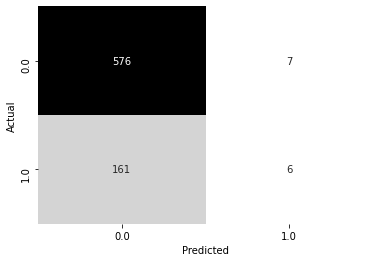

In [156]:
confusion_matrix_plot(test_targets.reshape(-1, 1), model_predictions)


所示的图表称为“混淆矩阵”。对角元素显示正确预测的数量。非对角线元素显示错误预测的数量。我们可以看到该模型表现合理，但通过高估**0-不还款**实现。这表明我们可能需要训练更长时间，调整模型的超参数，或更改模型的架构。